In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Метод главный компонент (PCA)

Один из наиболее широко используемых алгоритмов машинного обучения без учителя — метод главных компонент (principal component analysis, PCA).
    PCA представляет собой алгоритм понижения размерности, но он
может быть также удобен в качестве инструмента визуализации, фильтрации шума,
выделения и проектирования признаков,

(-0.0455830817980441,
 1.141297509149081,
 -0.014895066196102034,
 0.3155191169807142)

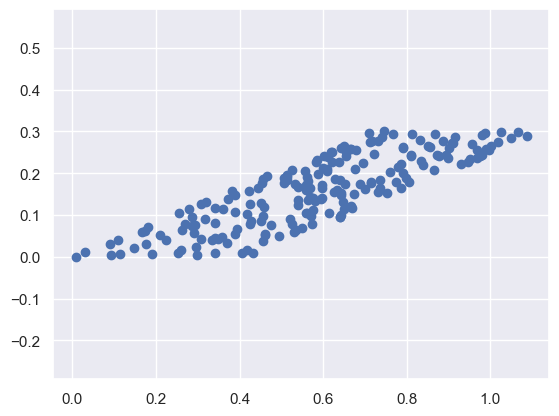

In [4]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.rand(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

В методе главных компонент выполняется количественная оценка этой зависимости путем нахождения списка главных осей координат (principal axes) данных и их
использования для описания набора данных

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [7]:
# компоненты
pca.components_

array([[-0.9534372 , -0.30159162],
       [ 0.30159162, -0.9534372 ]])

In [35]:
# объяснимая дисперсия (explained variance)
pca.explained_variance_

array([0.06022031, 0.00197053])

(-0.0455830817980441,
 1.141297509149081,
 -0.014895066196102034,
 0.3155191169807142)

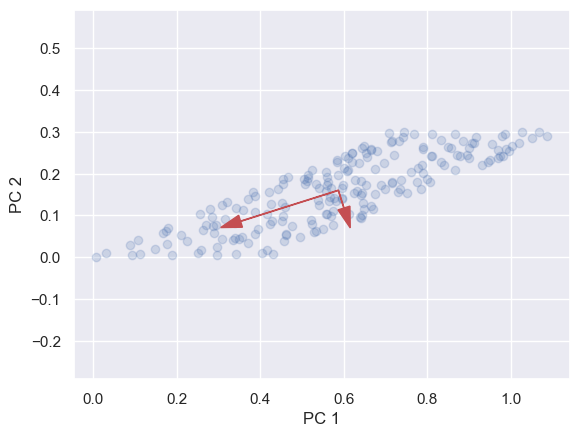

In [67]:
# визуализируем их в виде векторов над входными данными, 
# используя компоненты для задания направления векторов, 
# а объяснимую дисперсию — в качестве квадратов их длин

components = pca.components_
explained_variance = pca.explained_variance_

# Построение векторов
n_components = len(explained_variance)
feature_dim = components.shape[1]

# plt.figure(figsize=(10, 10))
plt.xlim(-0.5, 1)
plt.ylim(-1, 1)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
# plt.axhline(0, color='black',linewidth=0.5)
# plt.axvline(0, color='black',linewidth=0.5)

for i in range(n_components):
    v = components[i] * np.sqrt(explained_variance[i])
    plt.arrow(pca.mean_[0], pca.mean_[1], v[0], v[1], head_width=0.03, head_length=0.05, fc='r', ec='r')

plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.axis('equal')

Эти векторы отражают главные оси координат данных, а длина соответствует «важности» роли данной оси при описании распределения данных, точнее говоря, это мера дисперсии данных при проекции на эту ось. Проекции точек данных на главные оси и есть главные компоненты данных.

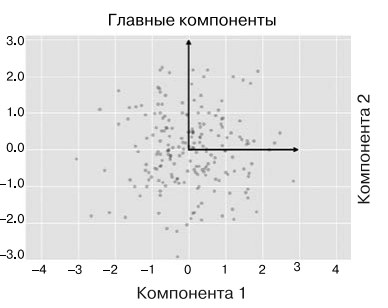
Это преобразование от осей координат данных к главным осям представляет собой
аффинное преобразование (affine transformation). По существу, это значит, что оно состоит из сдвига (translation), вращения (rotation) и пропорционального масштабирования (uniform scaling).

## PCA как метод понижения размерности

Использование метода PCA для понижения размерности включает обнуление одной или нескольких из наименьших главных компонент, в результате чего данные
проецируются на пространство меньшей размерности с сохранением максимальной
дисперсии данных.

In [75]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print(f"original shape: {X.shape}")
print(f"transformed shape: {X_pca.shape}")

original shape: (200, 2)
transformed shape: (200, 1)


(-0.0455830817980441,
 1.141297509149081,
 -0.03768143099603562,
 0.3326252648834046)

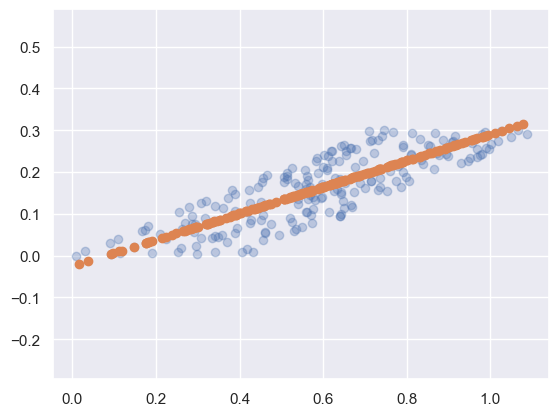

In [82]:
# обратное преобразование
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.axis('equal')

Несмотря на понижение размерности данных на 50 %, общая зависимость между точками данных по большей части была сохранена.

## Выбор количества компонент

Важнейшая составная часть использования метода PCA на практике — оценка
количества компонент, необходимого для описания данных. Определить это количество можно с помощью представления интегральной доли объяснимой дисперсии
(explained variance ratio) в виде функции от количества компонент.

Text(0, 0.5, 'Интегральная объяснимая дисперсия')

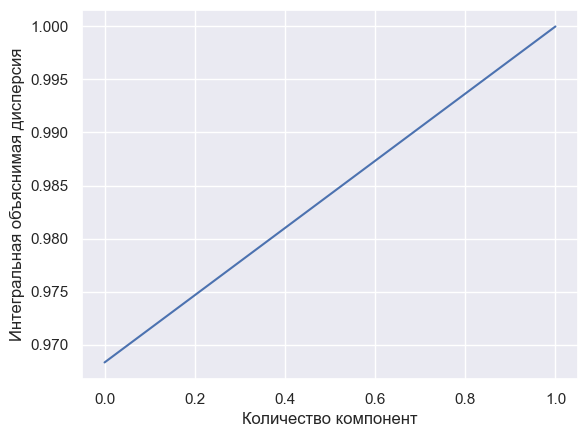

In [91]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Количество компонент')
plt.ylabel('Интегральная объяснимая дисперсия')

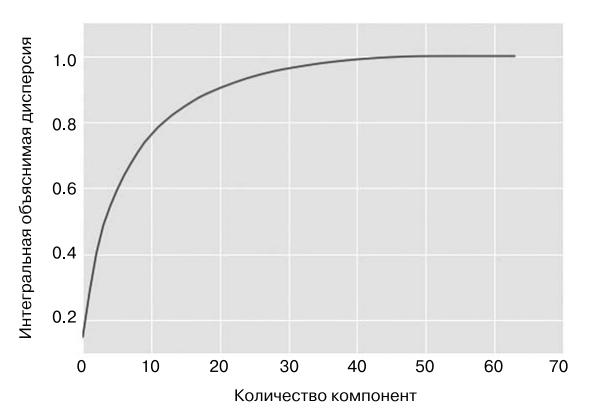
В данном случае видим, что при двумерной проекции теряется масса
информации (по оценке на основе объяснимой дисперсии) и что для сохранения
90% дисперсии необходимо около 20 компонент.

## Использование метода PCA для фильтрации шума


In [98]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

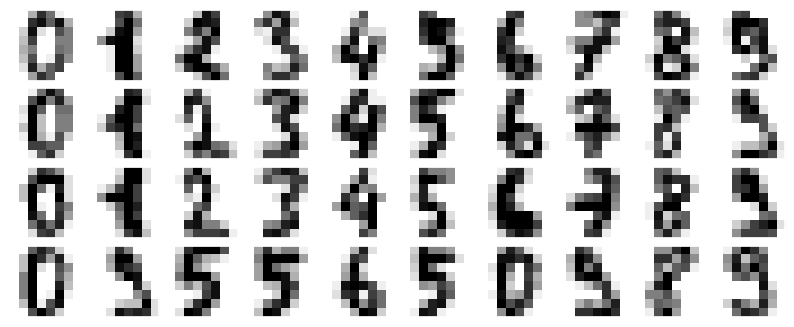

In [100]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                            subplot_kw={'xticks':[], 'yticks':[]},
                            gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                   clim=(0, 16))
plot_digits(digits.data)

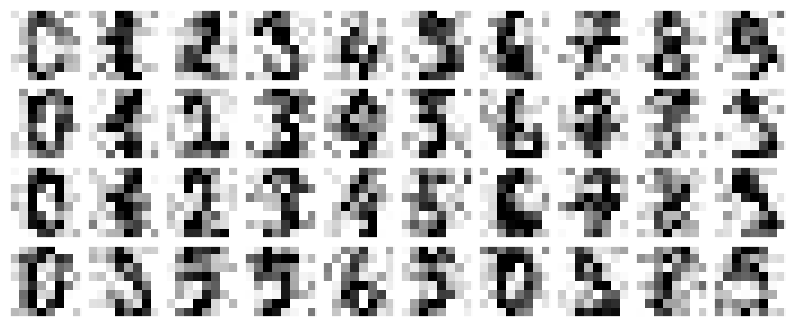

In [101]:
# добавим случайный шум
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [112]:
# Обучим алгоритм PCA на этих зашумленных данных, указав, 
# что проекция должна сохранять 50% дисперсии
pca = PCA(0.5).fit(noisy)
pca.n_components_

12

В данном случае 50% дисперсии соответствует 12 главным компонентам.

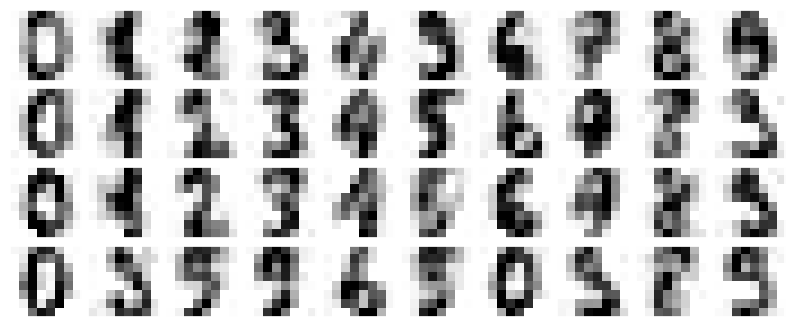

In [113]:
# вычислим эти компоненты
components = pca.transform(noisy)

# обратное преобразование для восстановления цифр
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## Резюме метода главных компонент


При работе с любым многомерным набором данных стоит начинать с использования метода PCA для визуализации зависимостей между
точками, выяснения дисперсии данных и выяснения внутренней размерности данных (путем построения графика доли объяснимой дисперсии). PCA не подходит для всех многомерных наборов данных, но с его помощью можно просто и эффективно почерпнуть о наборе многомерных данных полезную информацию.

Основной недостаток метода PCA состоит в том, что на него оказывают сильное влияние аномальные значения в данных. Поэтому было разработано немало ошибкоустойчивых вариантов PCA, многие из них стремятся итеративно отбрасывать те точки данных, которые описываются исходными компонентами недостаточно хорошо